Instalar librerías y dependencias necesarias

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

Lectura y limpieza de datos.

In [4]:
data=pd.read_csv('restaurants_dataset.csv',index_col='Registration Number')
print(data.columns)
print(data.head())

Index(['Annual Turnover', 'Cuisine', 'City', 'Restaurant Location',
       'Opening Day of Restaurant', 'Facebook Popularity Quotient',
       'Endorsed By', 'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating',
       'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy'],
      dtype='object')
                     Annual Turnover           Cuisine       City  \
Registration Number                                                 
60001                       42000000      indian,irish  Bangalore   
60002                 

Análisis de la cantidad de registros válidos que tiene cada columna

In [5]:
print(f'Cantidad de datos válidos en cada columna: \n{data.count()}')

Cantidad de datos válidos en cada columna: 
Annual Turnover                  3493
Cuisine                          3493
City                             3493
Restaurant Location              3493
Opening Day of Restaurant        3493
Facebook Popularity Quotient     3394
Endorsed By                      3493
Instagram Popularity Quotient    3437
Fire Audit                       3493
Liquor License Obtained          3493
Situated in a Multi Complex      3493
Dedicated Parking                3493
Open Sitting Available           3493
Resturant Tier                   3444
Restaurant Type                  3493
Restaurant Theme                 3493
Restaurant Zomato Rating         3493
Restaurant City Tier             3493
Order Wait Time                  3493
Staff Responsivness              3493
Value for Money                  3493
Hygiene Rating                   3493
Food Rating                      3493
Overall Restaurant Rating        3281
Live Music Rating                2728
Comedy

Se evidencia que las columnas 'Comedy Gigs Rating','Value Deals Rating', 'Live Sports Rating' no contienen una cantidad de datos representiva, serán dropeadas

In [6]:
cols_drop=['Comedy Gigs Rating','Value Deals Rating', 'Live Sports Rating']
data.drop(cols_drop,axis=1,inplace=True)
print(f'Datos luego de limpieza de columnas:\n{data.head()}')
print(f'Cantidad de datos válidos en cada columna: \n{data.count()}')

Datos luego de limpieza de columnas:
                     Annual Turnover           Cuisine       City  \
Registration Number                                                 
60001                       42000000      indian,irish  Bangalore   
60002                       50000000      indian,irish     Indore   
60003                       32500000   tibetan,italian    Chennai   
60004                      110000000  turkish,nigerian    Gurgaon   
60005                       20000000     irish,belgian    Manesar   

                    Restaurant Location Opening Day of Restaurant  \
Registration Number                                                 
60001                 Near Business Hub                14-02-2009   
60002                    Near Party Hub                29-09-2008   
60003                 Near Business Hub                30-07-2011   
60004                    Near Party Hub                30-11-2008   
60005                    Near Party Hub                22-02-2010

Eliminar Outliners del set de datos.

In [7]:
numeric_data=data.select_dtypes(include=['number'])
Q1=numeric_data.quantile(0.25)
Q3=numeric_data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

mask=mask = ~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[mask]

Annual Turnover                  1.900000e+07
Facebook Popularity Quotient     1.374500e+01
Instagram Popularity Quotient    1.640000e+01
Fire Audit                       0.000000e+00
Liquor License Obtained          0.000000e+00
Situated in a Multi Complex      0.000000e+00
Dedicated Parking                0.000000e+00
Open Sitting Available           0.000000e+00
Resturant Tier                   0.000000e+00
Restaurant Zomato Rating         1.000000e+00
Restaurant City Tier             1.000000e+00
Order Wait Time                  5.000000e+00
Staff Responsivness              1.000000e+00
Value for Money                  1.000000e+00
Hygiene Rating                   2.000000e+00
Food Rating                      3.000000e+00
Overall Restaurant Rating        3.000000e+00
Live Music Rating                2.000000e+00
Ambience                         3.000000e+00
Lively                           2.000000e+00
Service                          3.000000e+00
Comfortablility                  3

Para los valores que son Tiers y Ratings se va a aplicar normalización para encontrar correlaciones entre estas y la facturación anual


In [8]:
cols_norm=['Resturant Tier','Restaurant City Tier','Restaurant Zomato Rating','Order Wait Time','Staff Responsivness',
           'Hygiene Rating', 'Food Rating','Overall Restaurant Rating','Value for Money','Ambience','Lively','Service','Comfortablility','Privacy','Resturant Tier']

for col in cols_norm:
    data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())


Después de eliminar los Outliners y normalizar los datos, se evidencia que se eliminan todos los registros de la columna Resturant Tier esto se debe a que todos los valores son 2, normalizamos asignando un valor de 1 a todos sus valores.

Para la columna City se tienen 118 valores que no contienen información, se eliminan estos valores.


In [9]:
data['Resturant Tier']=1
data=data[data['City']!='-1']

print(f'Datos luego de limpieza de datos:\n{data.head()}')
print(f'Cantidad de datos válidos en cada columna: \n{data.count()}')

Datos luego de limpieza de datos:
                     Annual Turnover           Cuisine       City  \
Registration Number                                                 
60005                       20000000     irish,belgian    Manesar   
60006                       30000000     tibetan,greek  Hyderabad   
60010                       23000000  algerian,belgian    Kolkata   
60013                       27000000        welsh,thai       Pune   
60017                       32500000  turkish,nigerian      Noida   

                    Restaurant Location Opening Day of Restaurant  \
Registration Number                                                 
60005                    Near Party Hub                22-02-2010   
60006                    Near Party Hub                28-06-2011   
60010                    Near Party Hub                08-06-2012   
60013                    Near Party Hub                16-11-2009   
60017                    Near Party Hub                06-06-2011   

Visualización de los datos.

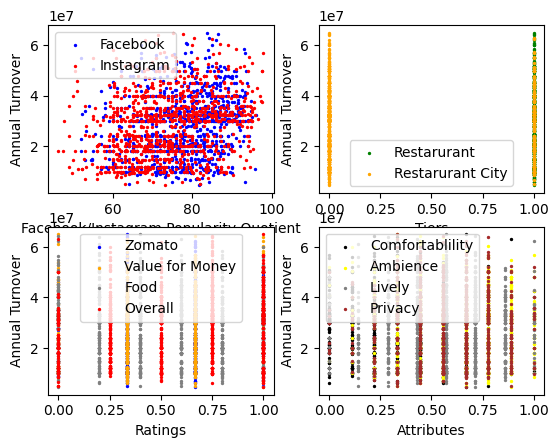

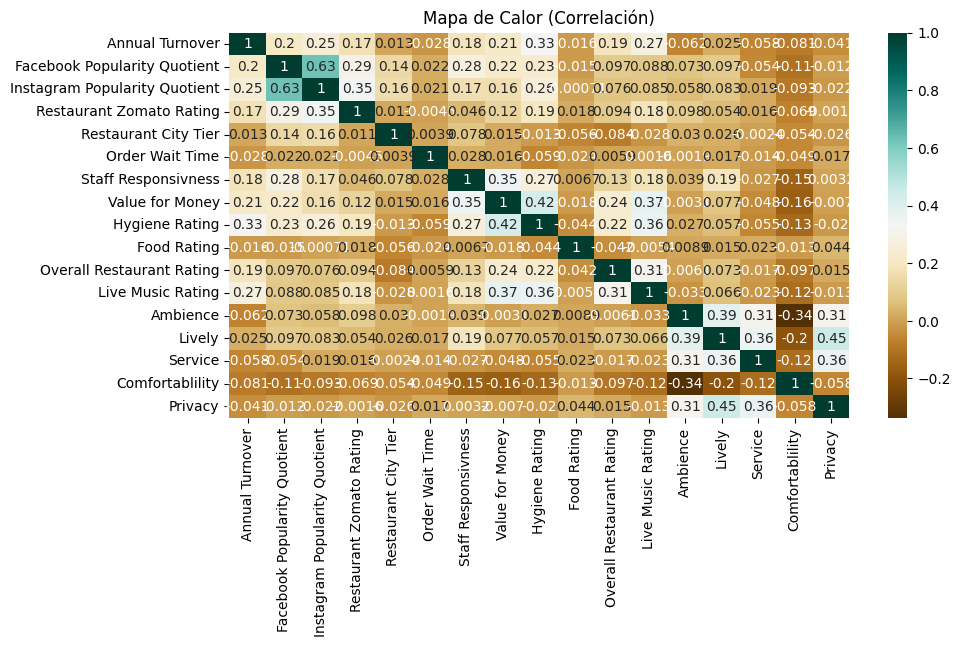

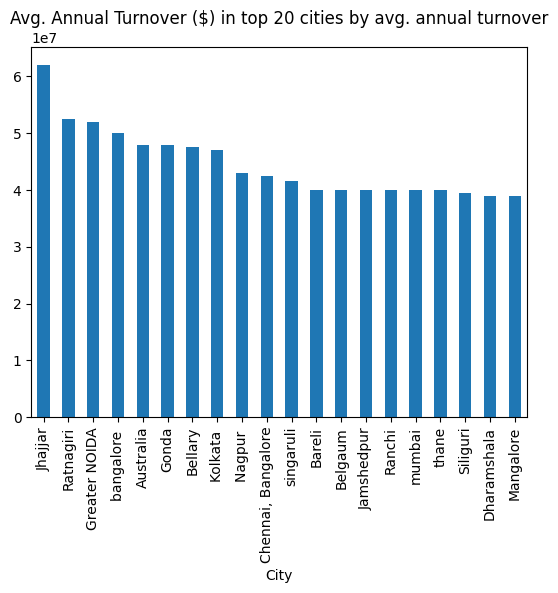

In [10]:
Y=data['Annual Turnover']
X1=data['Facebook Popularity Quotient']
X2=data['Instagram Popularity Quotient']
X3=data['Resturant Tier']
X4=data['Restaurant City Tier']
X5=data['Restaurant Zomato Rating']
X6=data['Comfortablility']
X7=data['Ambience']
X8=data['Lively']
X9=data['Food Rating']
X10=data['Overall Restaurant Rating']
X11=data['Value for Money']
X12=data['Privacy']

figure, axis = plt.subplots(2, 2)

axis[0,0].scatter(X1,Y,c='blue',label='Facebook',s=2)
axis[0,0].scatter(X2,Y,c='red',label='Instagram',s=2)
axis[0,0].set_xlabel('Facebook/Instagram Popularity Quotient')
axis[0,0].set_ylabel('Annual Turnover')
axis[0,0].legend()

axis[0,1].scatter(X3,Y,c='green',label='Restarurant',s=2)
axis[0,1].scatter(X4,Y,c='orange',label='Restarurant City',s=2)
axis[0,1].set_xlabel('Tiers')
axis[0,1].set_ylabel('Annual Turnover')
axis[0,1].legend()

axis[1,0].scatter(X5,Y,c='blue',label='Zomato',s=2)
axis[1,0].scatter(X11,Y,c='orange',label='Value for Money',s=2)
axis[1,0].scatter(X9,Y,c='gray',label='Food',s=2)
axis[1,0].scatter(X10,Y,c='red',label='Overall',s=2)
axis[1,0].set_xlabel('Ratings')
axis[1,0].set_ylabel('Annual Turnover')
axis[1,0].legend()

axis[1,1].scatter(X6,Y,c='black',label='Comfortablility',s=2)
axis[1,1].scatter(X7,Y,c='yellow',label='Ambience',s=2)
axis[1,1].scatter(X8,Y,c='gray',label='Lively',s=2)
axis[1,1].scatter(X12,Y,c='brown',label='Privacy',s=2)
axis[1,1].set_xlabel('Attributes')
axis[1,1].set_ylabel('Annual Turnover')
axis[1,1].legend()
plt.show()

plt.figure(figsize=(10,5))
cols_exclude=['Fire Audit',
    'Liquor License Obtained', 'Situated in a Multi Complex',
    'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier']
c= data.select_dtypes(include=['number']).drop(columns=cols_exclude).corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.title('Mapa de Calor (Correlación)')
plt.show()

data.groupby('City')['Annual Turnover'].mean().nlargest(20).plot(kind='bar')
plt.title('Avg. Annual Turnover ($) in top 20 cities by avg. annual turnover')
plt.show()


A partir de todo lo anterior podemos concluir lo siguiente:
1. Las columnas 'Comedy Gigs Rating','Value Deals Rating', 'Live Sports Rating' no tienen una cantidad de datos relevantes para el análisis.
2. Después de eliminar los Outliners, todos los registros de la columna 'Resturant Tier' son iguales a 2.
3. La correlación más fuerte de la Facturación Anual es con la columna 'Rating de Higiene'.
4. Se evidencia que la facturación anual puede estar influenciada por la ciudad en la que está el restaurante.
5. A pesar de que no existe una correlación fuerte para la Facturación Anual, existen correlaciones significativas de esta con las columnas 'Rating de Higiene', 'Rating de Música en Vivo', 'Valor por Precio' y los coeficientes de popularidad de Instagram y Facebook.


Entrenamiento de Modelos de Machine Learning.
Para la validación del performance de los modelos voy a utilizar el Error Medio Absoluto (MAE)

In [11]:
def get_mae(modelo,X_train,X_valid,y_train,y_valid):
    modelo.fit(X_train,y_train)
    val_prediccion=modelo.predict(X_valid)
    return(mean_absolute_error(y_valid,val_prediccion))

Para la preparación de los datos primero me ocupo de los valores numéricos. Voy a llenar los valores nulos con el promedio de la columna (Método Inputer)

In [12]:
num_cols=data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

parameters=data.drop(['Annual Turnover'],axis=1)
y=data['Annual Turnover']
X=data.drop(['Annual Turnover'],axis=1)

Ahora me ocupo de los valores categóricos, utilizaré un Original Encode para asignar un valor a cada valor que pueda tomar


In [13]:
X_obj=parameters.select_dtypes(include='object')
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=10)

object_cols= [col for col in X_train.columns if X_train[col].dtype == 'object']

Columnas que tienen los mismo valores únicos en el set de entrenamiento y en el de validación.

In [14]:
ok_label_cols = [col for col in object_cols if set(X_valid[col]).issubset(set(X_train[col]))]

not_ok_label_cols = list(set(object_cols)-set(ok_label_cols))
print(f'Columnas categóricas que están bien para hacer ordinal encode: {ok_label_cols}\nVan a ser eliminadas: {not_ok_label_cols}')


Columnas categóricas que están bien para hacer ordinal encode: ['Cuisine', 'Restaurant Location', 'Endorsed By', 'Restaurant Type']
Van a ser eliminadas: ['City', 'Opening Day of Restaurant', 'Restaurant Theme']


Separar datos de validación con los de entrenamiento

In [15]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)
print(X_train.head())

label_X_train = X_train.drop(not_ok_label_cols, axis=1)
label_X_valid = X_valid.drop(not_ok_label_cols, axis=1)

                            Cuisine       City Restaurant Location  \
Registration Number                                                  
62337                 japanese,thai    Chennai      Near Party Hub   
60736                 tibetan,greek  Hyderabad      Near Party Hub   
61294                 polish,jewish    Gurgaon      Near Party Hub   
60019                nigerian,cajun    Gurgaon      Near Party Hub   
61286                  indian,irish    Gurgaon      Near Party Hub   

                    Opening Day of Restaurant  Facebook Popularity Quotient  \
Registration Number                                                           
62337                              31-12-2012                     90.000000   
60736                              05-06-2010                     72.000000   
61294                              15-10-2010                     77.977671   
60019                              03-12-2011                     65.000000   
61286                              

Ordinal encode:

In [16]:
ordinal_encoder=OrdinalEncoder()
label_X_train[ok_label_cols] = ordinal_encoder.fit_transform(X_train[ok_label_cols])
label_X_valid[ok_label_cols] = ordinal_encoder.transform(X_valid[ok_label_cols])

Definición de Modelos:

In [ ]:
modelo_1=DecisionTreeRegressor(max_leaf_nodes=50,random_state=0)
modelo_2=RandomForestRegressor(n_estimators=100,random_state=0,criterion='absolute_error')
modelo_3=LinearRegression()
modelo_4= MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

print(f'MAE para primer Modelo (Tree Regressor): {get_mae(modelo_1,label_X_train, label_X_valid, y_train, y_valid)}')
print(f'MAE para segundo Modelo (Forest Regressor): {get_mae(modelo_2,label_X_train, label_X_valid, y_train, y_valid)}')
print(f'MAE para tercer Modelo (Linear Regressor): {get_mae(modelo_3,label_X_train, label_X_valid, y_train, y_valid)}')
print(f'MAE para cuarto Modelo (Red Neuronal): {get_mae(modelo_4,label_X_train, label_X_valid, y_train, y_valid)}')


MAE para primer Modelo (Tree Regressor): 10872653.866891962
MAE para segundo Modelo (Forest Regressor): 9224073.170731707
MAE para tercer Modelo (Linear Regressor): 8934780.54820853
MAE para cuarto Modelo (Red Neuronal): 9411958.822701372


c:\Users\juul_\OneDrive\Escritorio\prueba_tecnica\punto_1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


El modelo con el mejor perfomance es el de Regresión Lineal, vamos a aplicar HyperParameter Tuning al modelo Random Forest Regressor para refinarlo un poco más ya que al Lineal Regression no se le puede aplicar.

In [18]:
param_grid = {
    'n_estimators': [50, 100, 150 ,200, 300, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(label_X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
-9008289.36605317


Los parámetros que obtuvieron el mejor score fueron {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}

In [ ]:
print('--------PREDICIENDO ANNUAL TURNOVER PARA LOS SIGUIENTES 5 ESTABLECIMIENTOS CON MEJOR RANDOM FOREST REGRESSOR----------------')
print(sX_valid.head())
print("--------------------LAS PREDICCIONES SON-----------------------")
print(grid_search.best_estimator_.predict(label_X_valid.head()))

--------PREDICIENDO ANNUAL TURNOVER PARA LOS SIGUIENTES 5 ESTABLECIMIENTOS CON MEJOR RANDOM FOREST REGRESSOR----------------
                              Cuisine       City Restaurant Location  \
Registration Number                                                    
63181                turkish,nigerian    chennai      Near Party Hub   
60114                   tibetan,greek  Hyderabad      Near Party Hub   
60306                  nigerian,cajun      Noida      Near Party Hub   
62135                  peruvian,cuban     Mysore      Near Party Hub   
61143                   cuban,british      Noida      Near Party Hub   

                    Opening Day of Restaurant  Facebook Popularity Quotient  \
Registration Number                                                           
63181                              27-08-2010                         87.40   
60114                              13-04-2010                         91.43   
60306                              29-05-2012         